In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

In [2]:
# Display basic information
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])
data.info()
print(data.isnull().sum())

Number of Rows 284807
Number of Columns 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [3]:
# Standardize the 'Amount' feature
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

# Drop the 'Time' feature
data = data.drop(['Time'], axis=1)

In [4]:
# Drop duplicates
data = data.drop_duplicates()

# Display class distribution
print(data['Class'].value_counts())

Class
0    275190
1       473
Name: count, dtype: int64


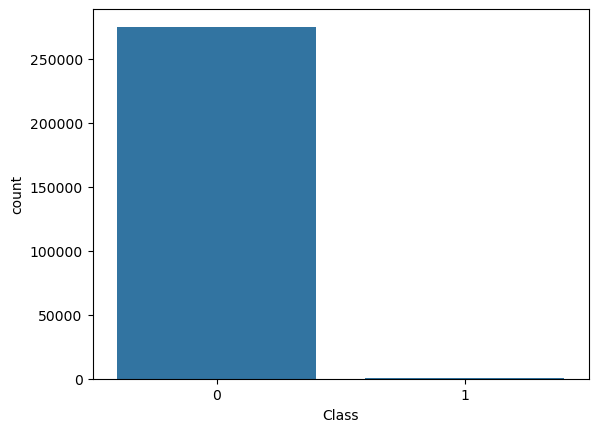

In [5]:
# Plot class distribution
sns.countplot(data=data, x='Class')
plt.show()

In [6]:
# Prepare the data for training
X = data.drop('Class', axis=1)
y = data['Class']

# Handle class imbalance using SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)
print(y_res.value_counts())

Class
0    275190
1    275190
Name: count, dtype: int64


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# Train Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))
print("Logistic Regression Precision:", precision_score(y_test, y_pred1))
print("Logistic Regression Recall:", recall_score(y_test, y_pred1))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred1))

Logistic Regression Accuracy: 0.9460372833315164
Logistic Regression Precision: 0.97311527260805
Logistic Regression Recall: 0.9173499627293057
Logistic Regression F1 Score: 0.9444101297096974


In [8]:
# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))
print("Decision Tree Precision:", precision_score(y_test, y_pred2))
print("Decision Tree Recall:", recall_score(y_test, y_pred2))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred2))

Decision Tree Accuracy: 0.9979014499073368
Decision Tree Precision: 0.9969694770079484
Decision Tree Recall: 0.9988364271039761
Decision Tree F1 Score: 0.9979020788491404


In [9]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred3))
print("Random Forest Precision:", precision_score(y_test, y_pred3))
print("Random Forest Recall:", recall_score(y_test, y_pred3))
print("Random Forest F1 Score:", f1_score(y_test, y_pred3))

Random Forest Accuracy: 0.9999091536756423
Random Forest Precision: 0.999818224783233
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9999091041303083


  Models        ACC
0     LR  94.603728
1     DT  99.790145
2     RF  99.990915


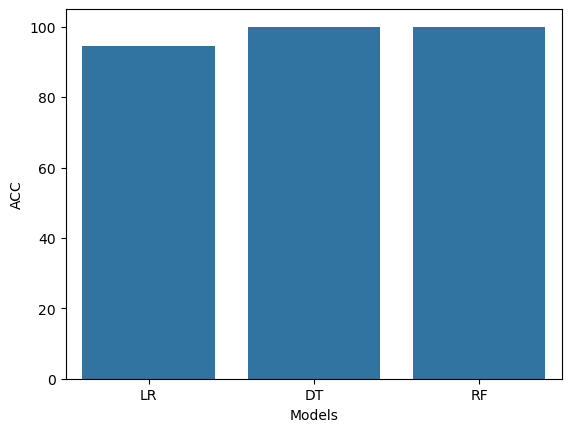

In [10]:
# Compare model performance
final_data = pd.DataFrame({
    'Models': ['LR', 'DT', 'RF'],
    'ACC': [accuracy_score(y_test, y_pred1) * 100, accuracy_score(y_test, y_pred2) * 100, accuracy_score(y_test, y_pred3) * 100]
})
print(final_data)
sns.barplot(data=final_data, x='Models', y='ACC')
plt.show()

In [11]:
# Train the final model on the entire dataset
rf1 = RandomForestClassifier()
rf1.fit(X_res, y_res)

RandomForestClassifier()

In [12]:
# Save the final model
import joblib
joblib.dump(rf1, 'final_model.pkl')

['final_model.pkl']